# 2 УРОК :  ПРОВЕРКА ГИПОТЕЗ

# Минипроект



# Шаг 2.1

В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

Задание

* Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

* Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

* Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

* Проанализируйте CTR с разбивкой по рекламной кампании.

* Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 

* Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

* Посчитайте конверсию из клика в покупку.

Описание данных

* ad_id – идентификатор объявления (рекламы)
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
* fb_campaign_id – идентификатор кампании в Facebook
* age – возрастная группа, которой показывалась реклама
* gender – пол тех, кому показывалась реклама
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* impressions – число показов
* clicks – число кликов
* spent – сумма, которую компания потратила на показ объявления 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы

# Шаг 2.2 

Задание 1

Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 
import os

In [3]:
df = pd.read_csv('conversion.csv')

In [4]:
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
df.shape

(1143, 11)

In [11]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [48]:
df.isna().sum() # смотрим на наличие пропущенных данных

ad_id                    0
xyz_campaign_id          0
fb_campaign_id           0
age                      0
gender                   0
interest                 0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
CTR                      0
CPC                    207
CR                     136
dtype: int64

In [6]:
df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [9]:
# Разбор
df.nunique()  # Альтернативный вариант посмотреть количество уникальных рекламных кампаний (xyz_campaign_id)

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

# Шаг 2.3

Задание 2

Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.

                 Дискретная	Непрерывная	Ранговая/порядковая	Номинативная
                 
* age				
* impressions				
* gender				
* interest				
* approved_conversion				
* total_conversion				
* spent				
* clicks				

$Ответ$
* Дискретная: impressions, approved_conversion, total_conversion, clicks
* Непрерывная: spent    
* Ранговая/порядковая: age    
* Номинативная: gender, interest 
    

# Шаг 2.4

Задание 3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. 

Выберите верные утверждения:

* Распределение унимодальное
* Распределение симметричное
* Полученное распределение не является нормальным
* Распределение бимодальное
* Полученное распределение является нормальным

Hint: np.log()

In [13]:
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [14]:
distribution_of_the_number_of_impressions = df.groupby('fb_campaign_id').agg({'Impressions' : 'sum'})
distribution_of_the_number_of_impressions = np.log(distribution_of_the_number_of_impressions)

In [15]:
distribution_of_the_number_of_impressions 

,Impressions
fb_campaign_id,
103916,8.902456
103917,9.790375
103920,6.541030
103928,9.035034
103929,7.557473
...,...
179977,13.937527
179978,13.365386
179979,11.928546


In [16]:
distribution_of_the_number_of_impressions.describe()

,Impressions
count,691.000000
mean,10.293877
std,2.528320
min,4.465908
25%,8.256165
50%,10.074074
75%,12.489973
max,15.525402


C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

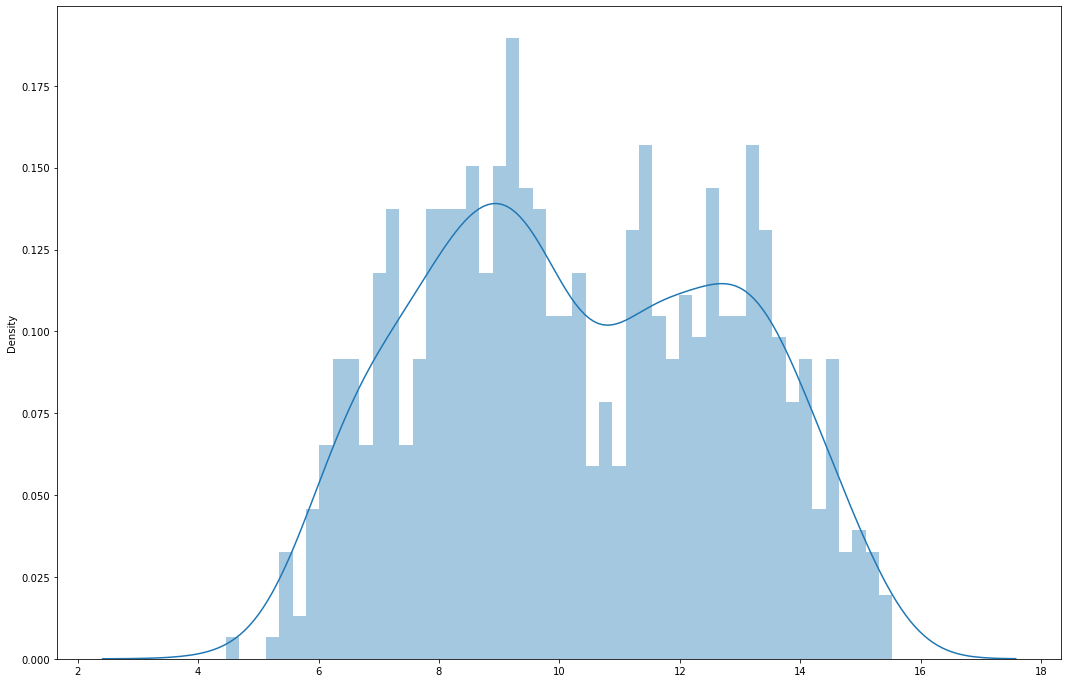

In [17]:
plt.figure(figsize=(18, 12))
sns.distplot(distribution_of_the_number_of_impressions, bins=50)

C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Impressions', ylabel='Density'>

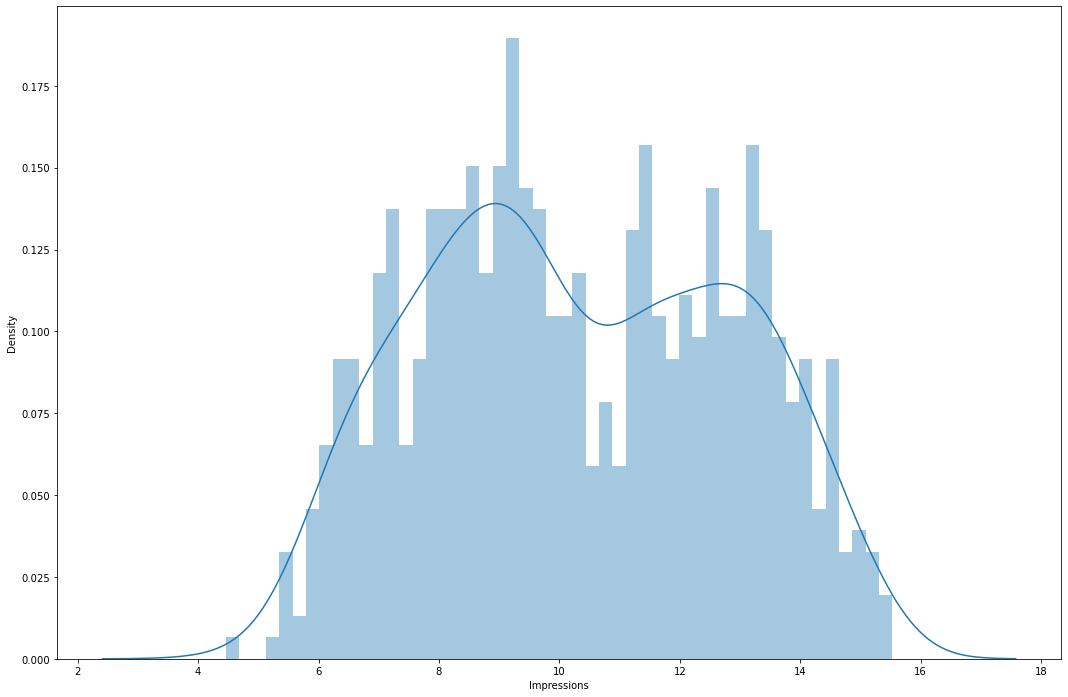

In [20]:
# Разбор. Можно вот так :-)

plt.figure(figsize=(18, 12))
sns.distplot(np.log(df.groupby('fb_campaign_id').Impressions.sum()), bins=50)

# Шаг 2.5

Задание 4

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

CTR=  clicks / impressions 

 
Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

Если нужна помощь, напишите сюда

In [22]:
df['CTR'] =   df.Clicks / df.Impressions

In [23]:
df.CTR.idxmax() # для поиска индекса максимального значения в Series

150

In [24]:
df.sort_values('CTR',  ascending = False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


In [25]:
df.iloc[150] # для фильтрации рядов по индексу

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
CTR                    0.001059
Name: 150, dtype: object

In [26]:
# Разбор
df.iloc[df.CTR.idxmax()]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
CTR                    0.001059
Name: 150, dtype: object

# Шаг 2.6

Задание 5

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 

Какому графику соответствует распределение CTR кампании 916?

In [27]:
df_26=df.query('xyz_campaign_id == 916')

In [28]:
df_26.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR', ylabel='Density'>

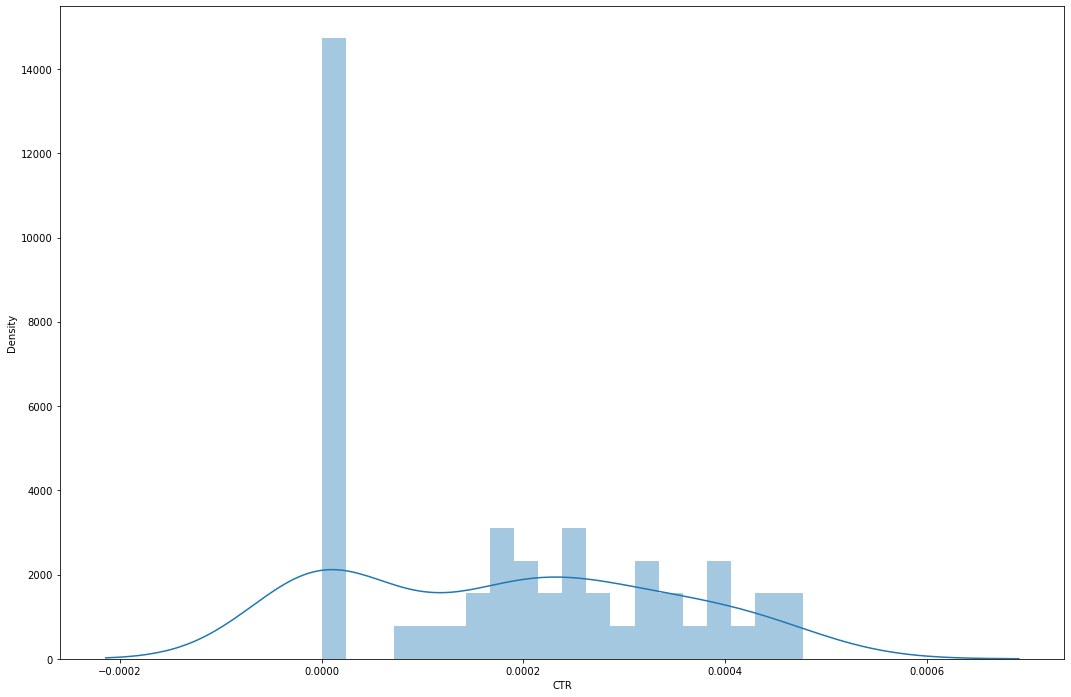

In [29]:
plt.figure(figsize=(18, 12))
sns.distplot(df_26.CTR, bins=20) 

# Шаг 2.7

Задание 6

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

CPC= spent / clicks
 

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [31]:
CPC = df.Spent/df.Clicks
CPC = CPC.dropna()

In [32]:
CPC

0       1.430000
1       0.910000
3       1.250000
4       1.290000
6       1.590000
          ...   
1138    1.421389
1139    1.449000
1140    1.438929
1141    1.471926
1142    1.452719
Length: 936, dtype: float64

In [33]:
CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
dtype: float64

C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

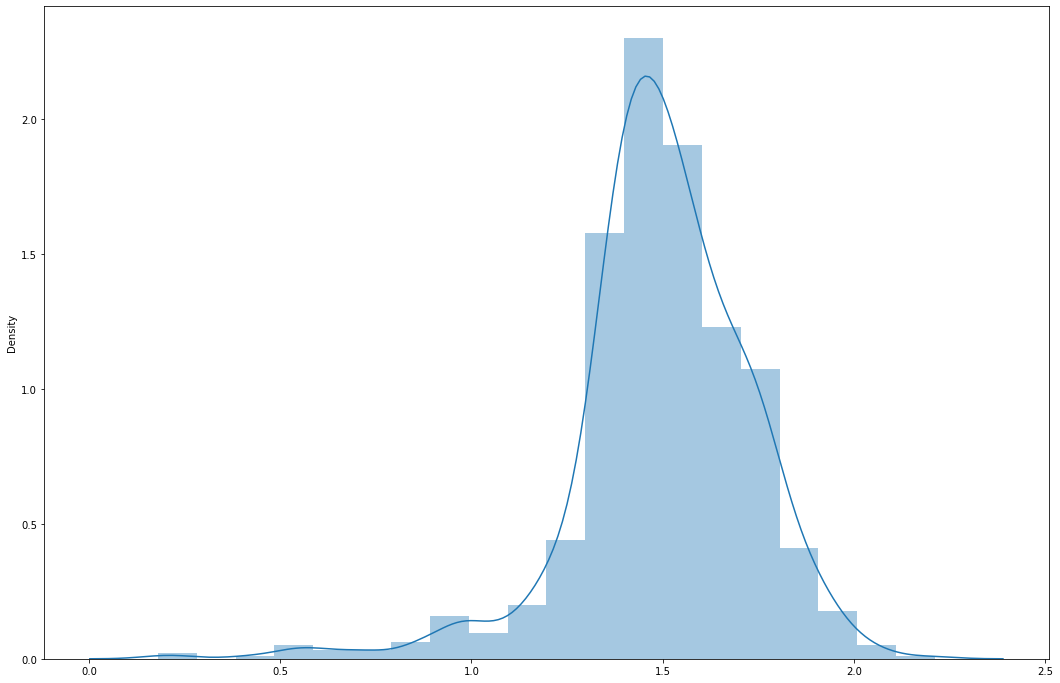

In [34]:
plt.figure(figsize=(18, 12))
sns.distplot(CPC, bins=20) 

In [35]:
from scipy import stats as ss

In [36]:
round(ss.iqr(CPC, nan_policy='omit'),2) # межквартильный размах

0.25

# Шаг 2.8

Задание 7

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

Чтобы избежать появление ошибки, можно указать .dropna() при построении графика. Обратите внимание, что удалять NaN из самого датасета не нужно, только для визуализации. Картинка в полном размере – здесь.

In [37]:
CPC_m = df.query('gender == "M"').Spent/df.query('gender == "M"').Clicks
CPC_m = CPC_m.dropna()

In [38]:
CPC_F = df.query('gender == "F"').Spent/df.query('gender == "F"').Clicks
CPC_F = CPC_F.dropna()

C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

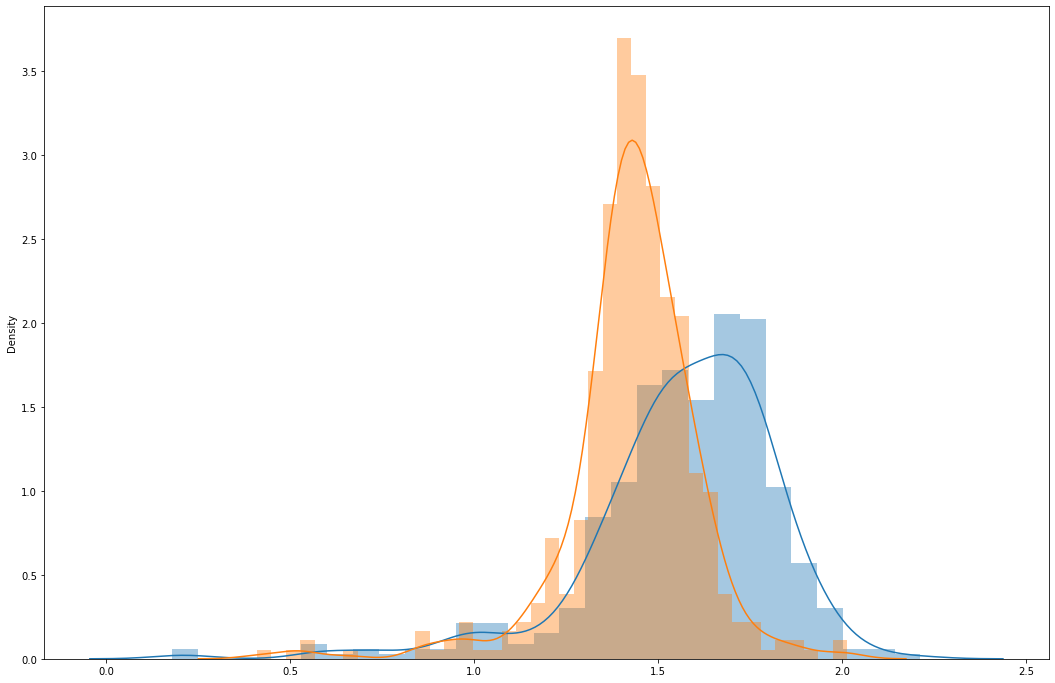

In [39]:
plt.figure(figsize=(18, 12))
sns.distplot(CPC_m) 
sns.distplot(CPC_F) 

C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ihar237\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC', ylabel='Density'>

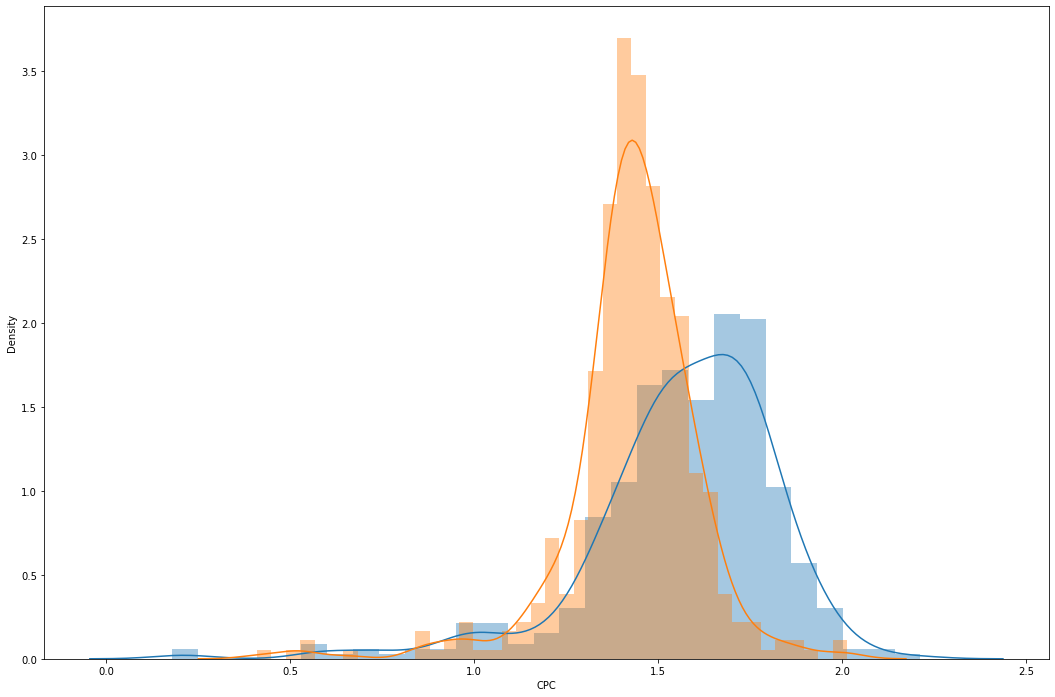

In [43]:
# Разбор
df['CPC'] = df.Spent/df.Clicks

plt.figure(figsize=(18, 12))
sns.distplot(df.query('gender == "M"').CPC.dropna()) 
sns.distplot(df.query('gender == "F"').CPC.dropna()) 

# Шаг 2.9

Задание 8

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

Note: клики – Clicks, покупки – Approved_Conversion.

In [44]:
df['CR'] = df.Approved_Conversion / df.Clicks 

In [45]:
df.query('ad_id == 1121814')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,0.030879


In [47]:
# Разбор:
df['CR'] = ((df.Approved_Conversion / df.Clicks).mul(100)) 
round(df.query('ad_id == 1121814')['CR'],2)

860    3.09
Name: CR, dtype: float64